In [1]:
!pip install torchsampler
!pip install xgboost
!pip install torchmetrics
!pip install pytorch_lightning
!pip install optuna
!pip install memory_profiler

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 779.9 kB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 17.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 766.7/766.7 MB 7.4 MB/s eta 0:00:00:00:010:03m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 5.9 MB/s eta 0:00:0000:01m00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 92.6 MB/s eta 0:00:00:00:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 63.6 MB/s eta 0:00:0000:0100:01m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 127.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 8.6 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 18.0 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 32.0 MB/s eta 0:00:0000:0100:01m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 23.8 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━

In [12]:
!pip install opencv-python-headless


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.0/50.0 MB 20.0 MB/s eta 0:00:0000:0100:01


In [10]:
!pip install scikit-learn
!pip install matplotlib
! pip install imageio
! pip install cv2

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 315.8/315.8 kB 10.5 MB/s eta 0:00:00


In [1]:
from torch.utils.data import WeightedRandomSampler
import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
from torchvision import datasets, models, transforms
import time
import os
import copy
from torch.utils.data import DataLoader, TensorDataset, WeightedRandomSampler
from torchvision.datasets import ImageFolder
import numpy as np
import matplotlib.pyplot as plt
#import cv2
import numpy as np
import imageio as io
from PIL import Image
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
import torchvision
import torchvision.transforms as transforms
from pytorch_lightning.callbacks import EarlyStopping
from pytorch_lightning.callbacks import ModelCheckpoint
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier

import torchmetrics
import pytorch_lightning as pl

import data_loader as dl
import experiments as e
from sklearn.model_selection import StratifiedKFold, cross_val_score


!python --version
!nvcc --version
!pip install nvcc4jupyter
%load_ext nvcc4jupyter
class_names = ['Abstract_Expressionism','Baroque','Cubism', 'Fauvism', 'Impressionism','Minimalism','Naive_Art_Primitivism','Pointillism','Rococo','Ukiyo_e']
device = 'cpu'

num_classes = 10


Python 3.10.12
nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2023 NVIDIA Corporation
Built on Mon_Apr__3_17:16:06_PDT_2023
Cuda compilation tools, release 12.1, V12.1.105
Build cuda_12.1.r12.1/compiler.32688072_0
Source files will be saved in "/tmp/tmpej6pqfwt".


In [2]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import f1_score
import  numpy as np
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
import time
import psutil
import pandas as pd
from sklearn.metrics import  ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.metrics import (
    classification_report, roc_curve, auc, precision_recall_curve, confusion_matrix
)
def precision_recall_draw(y_true, y_score):
    from sklearn.preprocessing import label_binarize
    from sklearn.metrics import precision_recall_curve

    y_test_bin = label_binarize(y_true, classes=[i for i in range(len(class_names))])

    plt.figure(figsize=(15, 10))
    for i, class_name in enumerate(class_names):
        precision, recall, _ = precision_recall_curve(y_test_bin[:, i], y_score[:, i])
        plt.plot(recall, precision, lw=2, label=f'{class_name}')

    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve for Each Class')
    plt.legend(loc="best")
    plt.grid(True)
    plt.show()


def roc_draw(y_true, y_score):
  from sklearn.preprocessing import label_binarize
  plt.figure(figsize=(15, 10))
  y_test_bin = label_binarize(y_true, classes=[i for i in range(len(class_names))])


  for i, class_name in enumerate(class_names):
     fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_score[:, i])
     roc_auc = auc(fpr, tpr)
     plt.plot(fpr, tpr, lw=2, label=f'{class_name} (AUC = {roc_auc:.2f})')


  plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('Receiver Operating Characteristic Curve')
  plt.legend(loc="best")
  plt.grid(True)
  plt.show()


def evaluate_model(y_true, y_pred, y_pred_proba):
    report_dict = classification_report(y_pred, y_true, target_names=class_names, output_dict=True)
    metrics_df2 = pd.DataFrame(report_dict).transpose()
    print(metrics_df2)
    print("-----------------------------------------------------------------------------------------------------------")

    precision_recall_draw(y_true, y_pred_proba)
    roc_draw(y_true, y_pred_proba)
    cm =confusion_matrix(y_true, y_pred, normalize = 'true')
    #cm_percent_row = cm.astype('float') / cm.sum(axis=1, keepdims=True) * 100
    
    disp = ConfusionMatrixDisplay(cm*100, display_labels=class_names)

    fig, ax = plt.subplots(figsize=(8, 6))
    disp.plot(cmap="cividis", ax=ax) 
    for _, spine in ax.spines.items():
        spine.set_visible(False)  

    plt.xticks(rotation=90, ha="right")
    plt.yticks(rotation=0)
    plt.grid(False) 
    plt.title("Confusion Matrix")
    #plt.colorbar(ax.collections[0], ax=ax)  
    disp = ConfusionMatrixDisplay(confusion_matrix(y_true, y_pred), display_labels=class_names)

    fig, ax = plt.subplots(figsize=(8, 6))
    disp.plot(cmap="cividis", ax=ax) 
    for _, spine in ax.spines.items():
        spine.set_visible(False)  

    plt.xticks(rotation=90, ha="right")
    plt.yticks(rotation=0)
    plt.grid(False) 
    plt.title("Not normalized Confusion Matrix")
    plt.show()

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pickle

with open('X_transnew.pickle', 'rb') as handle:
    train_data = pickle.load(handle)
with open('Y_transnew.pickle', 'rb') as handle:
    train_labels = pickle.load(handle)

X_train, X_test, y_train, y_test = train_test_split(train_data, train_labels, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
train_data_scaled = scaler.fit_transform(train_data)

train_labels = np.array(train_labels)
train_labels = train_labels.ravel()


print(f"Train: {np.shape(X_train)}, Test: {np.shape(X_test)}")
print(f"Train: {np.shape(train_data)}, Test: {np.shape(train_labels)}")

Train: (14804, 867), Test: (3701, 867)
Train: (18505, 867), Test: (18505,)


In [15]:
! pip install scikit-image

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.8/14.8 MB 18.7 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 226.4/226.4 kB 32.7 MB/s eta 0:00:00


In [ ]:
X_train shape: (14804, 1)
y_train shape: (14804, 867)

1. Transformer Parameter Search

                        precision    recall  f1-score      support
Abstract_Expressionism   0.911927  0.898734  0.905282   553.000000
Baroque                  0.962521  0.933884  0.947987   605.000000
Cubism                   0.901602  0.924883  0.913094   426.000000
Fauvism                  0.818182  0.838509  0.828221   161.000000
Impressionism            0.930320  0.937381  0.933837   527.000000
Minimalism               0.935780  0.906667  0.920993   225.000000
Naive_Art_Primitivism    0.900212  0.898305  0.899258   472.000000
Pointillism              0.866667  0.859504  0.863071   121.000000
Rococo                   0.907990  0.944584  0.925926   397.000000
Ukiyo_e                  0.971963  0.971963  0.971963   214.000000
accuracy                 0.918671  0.918671  0.918671     0.918671
macro avg                0.910716  0.911441  0.910963  3701.000000
weighted avg             0.919076  0.918671  0.918753  3701.000000
--------------------------------------------------------------

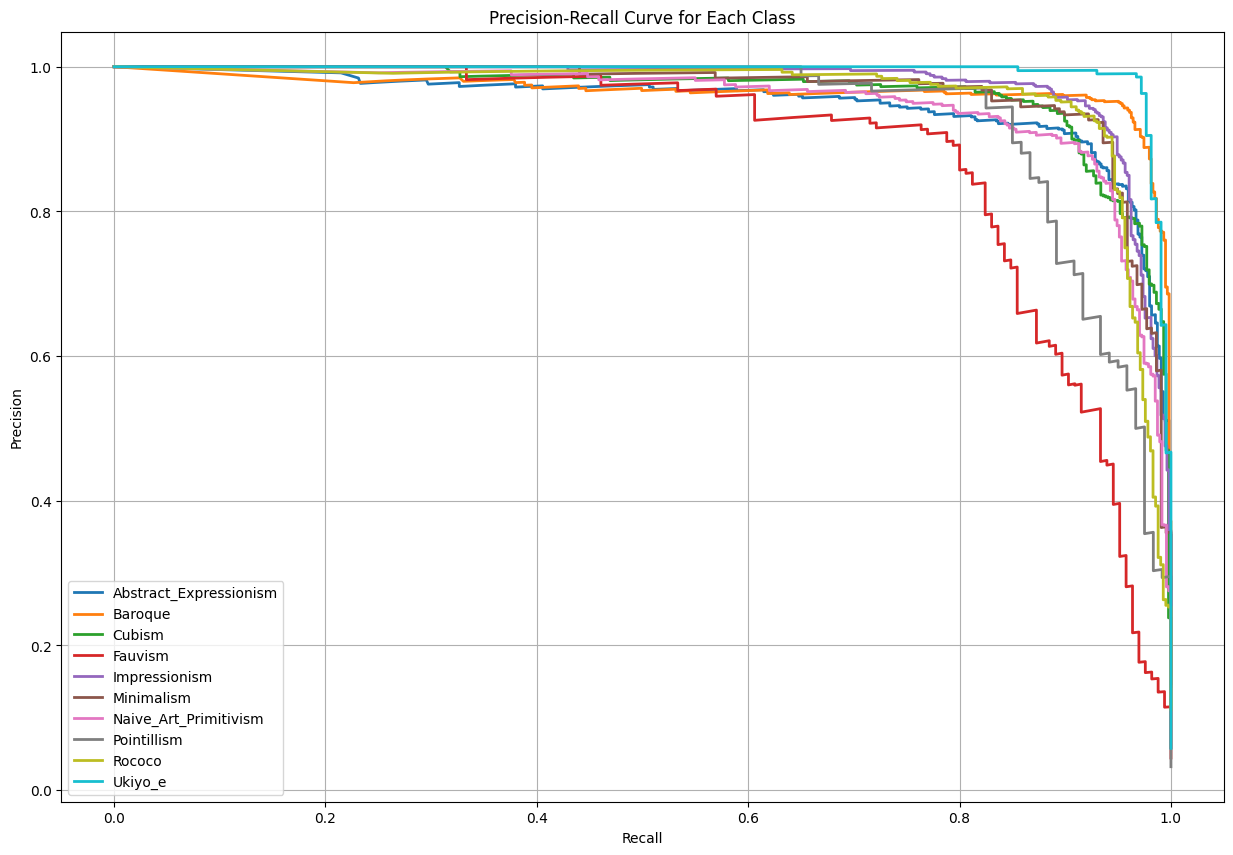

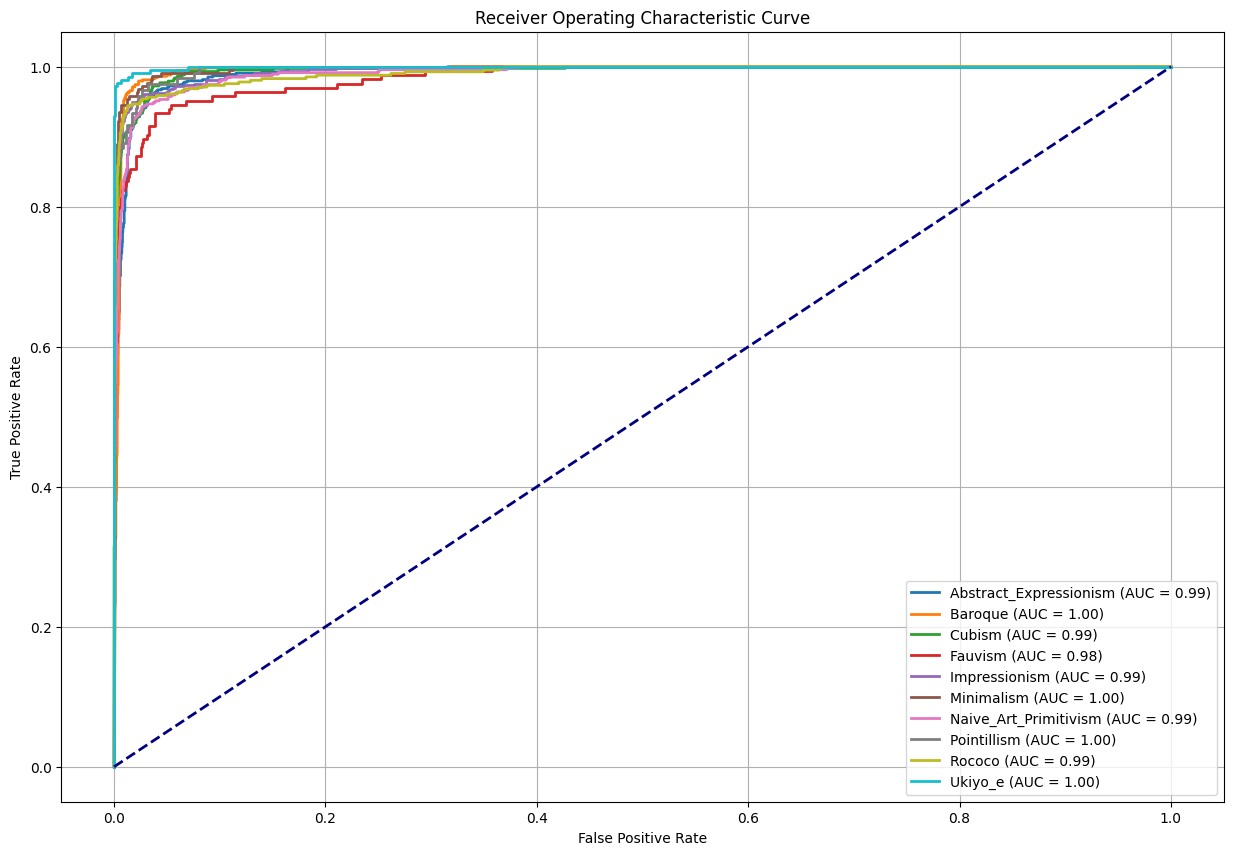

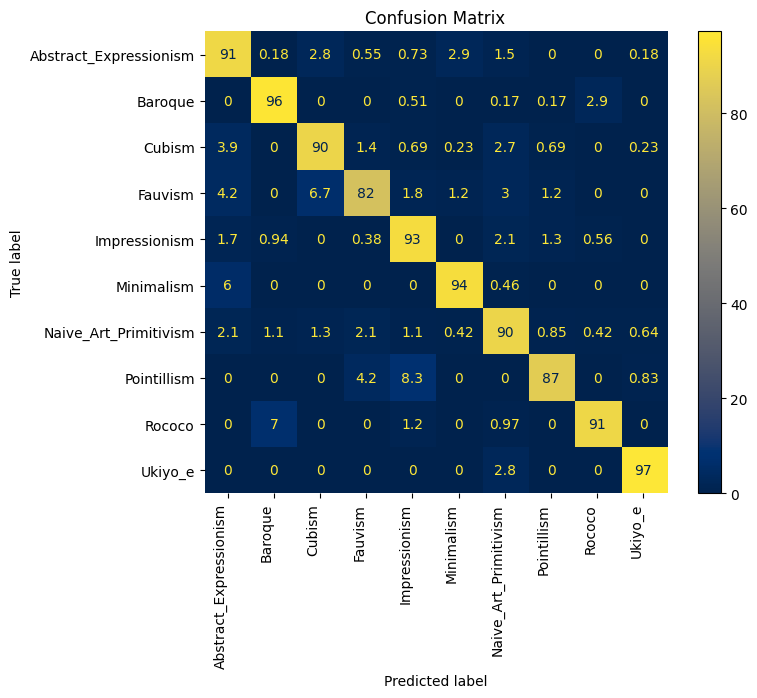

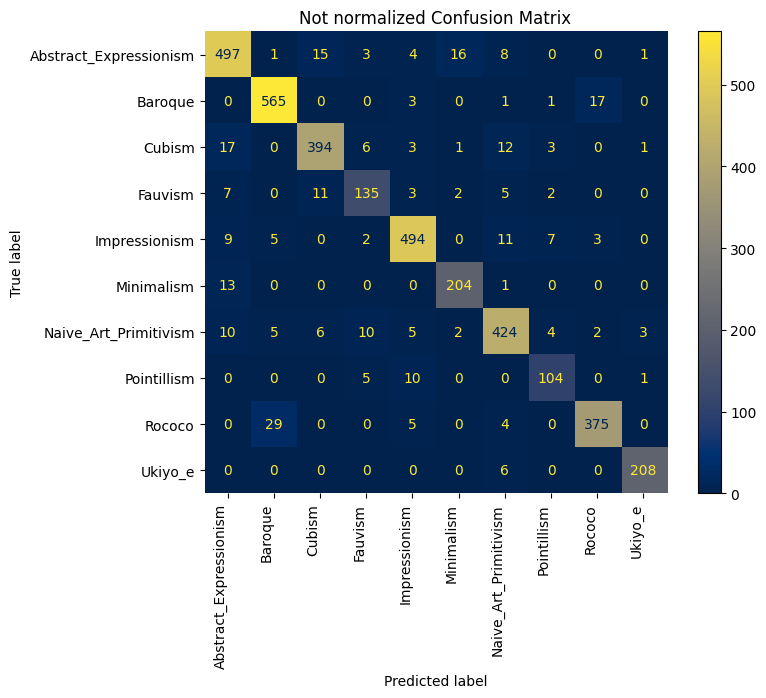

In [4]:
from sklearn.neural_network import MLPClassifier

best_mlp = MLPClassifier(
    hidden_layer_sizes=(490, 221, 116),
    solver="lbfgs",  
    learning_rate="adaptive",  
    learning_rate_init=0.0019296907971858555,  
    alpha=2.0617072079456476e-06, 
    batch_size=64, 
    activation="relu",  
    max_iter=303, 
    early_stopping=True,  
    random_state=42  
)
best_mlp.fit(X_train_scaled, y_train)
frmodel_pred = best_mlp.predict(X_test_scaled)
frmodel_pred_proba = best_mlp.predict_proba(X_test_scaled)

evaluate_model(y_test,frmodel_pred,frmodel_pred_proba)



In [5]:
best_mlp = MLPClassifier(
    hidden_layer_sizes=(490, 221, 116),
    solver="lbfgs",  
    learning_rate="adaptive",  
    learning_rate_init=0.0019296907971858555,  
    alpha=2.0617072079456476e-06,  
    batch_size=64,  
    activation="relu", 
    max_iter=303,  
    early_stopping=True,  
    random_state=42  
)
avg= e.kfold_crossvalidation(train_data, train_labels, 5,  best_mlp , 1)
print(avg)

       Fold  Precision    Recall        F1  Accuracy  Train time  \
0         1   0.920198  0.920022  0.920027  0.920022  202.805169   
1         2   0.907978  0.907593  0.907676  0.907593  206.498831   
2         3   0.910239  0.910024  0.910054  0.910024  210.579207   
3         4   0.914032  0.913807  0.913870  0.913807  205.418614   
4         5   0.922821  0.922724  0.922654  0.922724  198.692132   
5   Average   0.915054  0.914834  0.914856  0.914834  204.798791   
6  1.581139   0.006346  0.006438  0.006386  0.006438    4.414559   

   Prediction time  
0         0.119988  
1         0.415683  
2         0.118947  
3         0.281061  
4         0.291239  
5         0.245384  
6         0.126578  


In [6]:
from sklearn.svm import SVC
svc_model = SVC(
    kernel='poly', 
    C=39.55159458196473, 
    gamma=0.06924486730918748, 
    degree=3, 
    random_state=42
)

avg= e.kfold_crossvalidation(train_data, train_labels, 5,  svc_model , 1)
print(avg)

       Fold  Precision    Recall        F1  Accuracy  Train time  \
0         1   0.933747  0.933531  0.933500  0.933531  254.210715   
1         2   0.926237  0.925966  0.925780  0.925966  259.200853   
2         3   0.921259  0.920562  0.920483  0.920562  245.808020   
3         4   0.922898  0.922724  0.922487  0.922724  245.703585   
4         5   0.927741  0.927047  0.926816  0.927047  246.206673   
5   Average   0.926376  0.925966  0.925813  0.925966  250.225969   
6  1.581139   0.004861  0.004953  0.004989  0.004953    6.175591   

   Prediction time  
0        55.786521  
1        58.708082  
2        57.199508  
3        56.299492  
4        56.906203  
5        56.979961  
6         1.109885  


                        precision    recall  f1-score      support
Abstract_Expressionism   0.933945  0.905694  0.919603   562.000000
Baroque                  0.967632  0.940397  0.953820   604.000000
Cubism                   0.924485  0.911964  0.918182   443.000000
Fauvism                  0.812121  0.911565  0.858974   147.000000
Impressionism            0.958569  0.913824  0.935662   557.000000
Minimalism               0.908257  0.961165  0.933962   206.000000
Naive_Art_Primitivism    0.915074  0.909283  0.912169   474.000000
Pointillism              0.833333  0.961538  0.892857   104.000000
Rococo                   0.917676  0.966837  0.941615   392.000000
Ukiyo_e                  0.971963  0.981132  0.976526   212.000000
accuracy                 0.929479  0.929479  0.929479     0.929479
macro avg                0.914305  0.936340  0.924337  3701.000000
weighted avg             0.930958  0.929479  0.929713  3701.000000
--------------------------------------------------------------

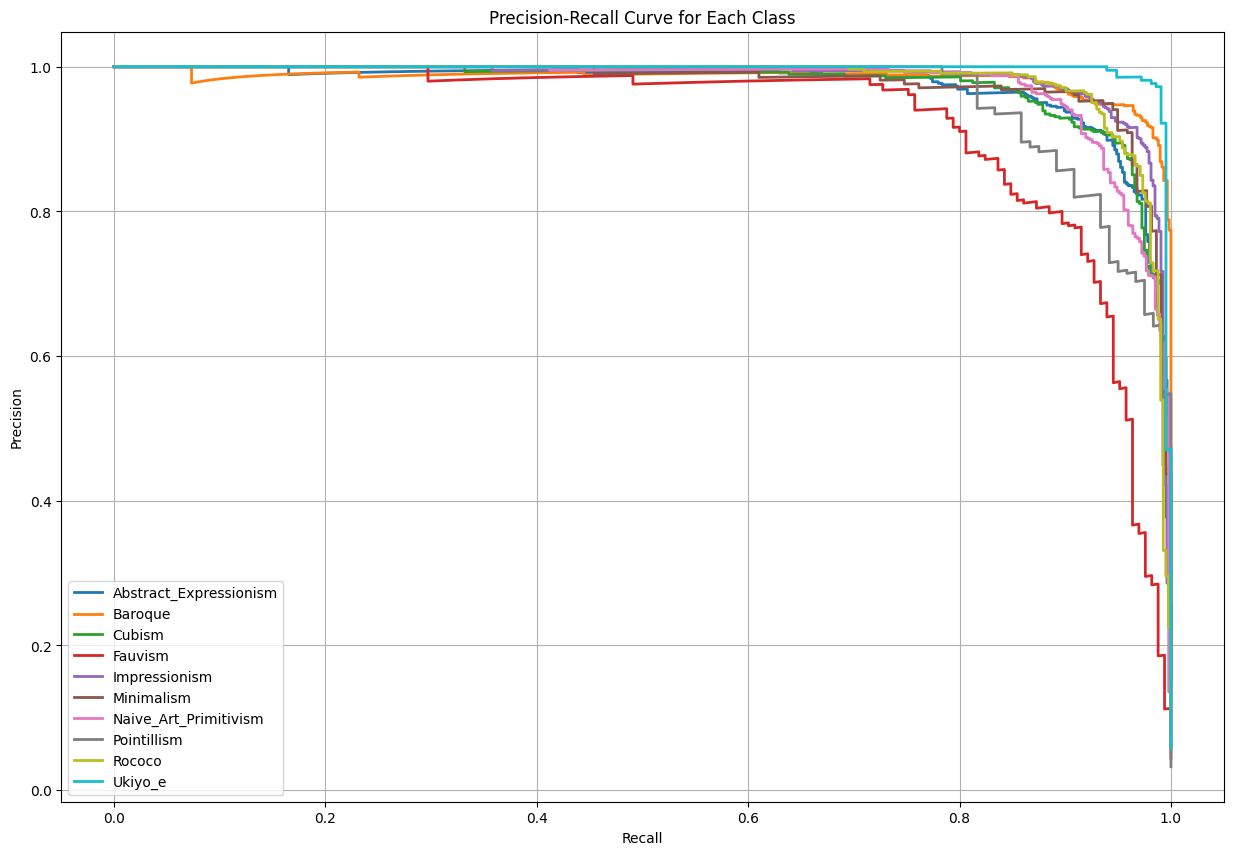

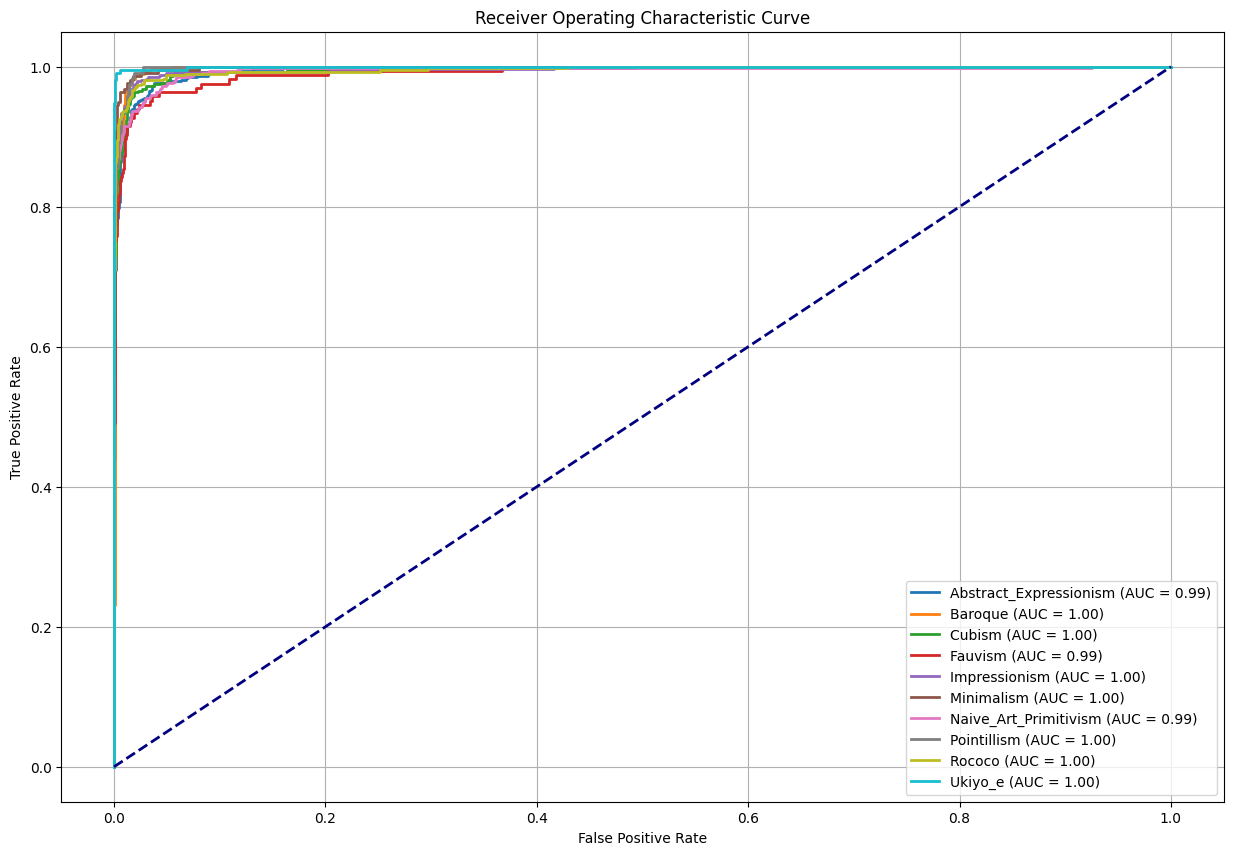

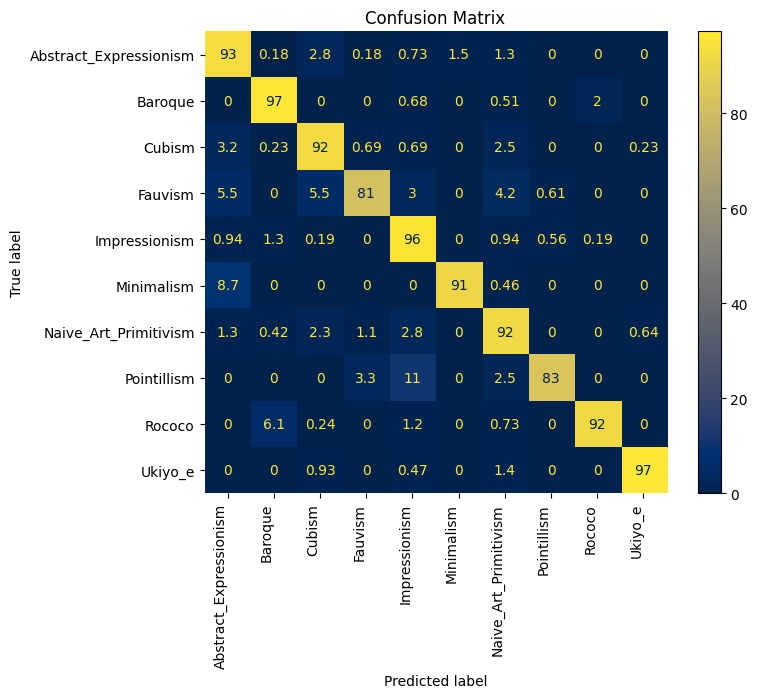

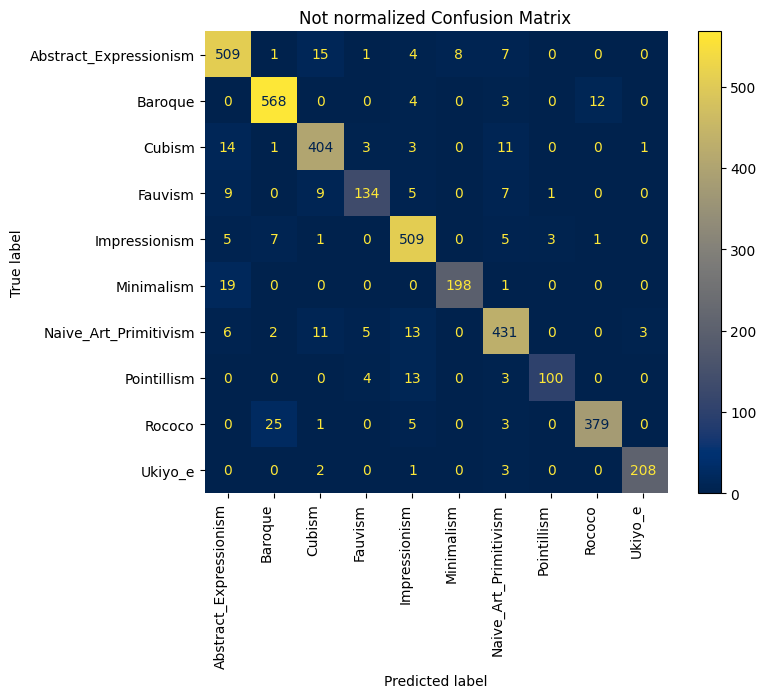

In [7]:
from sklearn.svm import SVC

svc_model = SVC(
    kernel='poly', 
    C=39.55159458196473, 
    gamma=0.06924486730918748, 
    degree=3, 
    random_state=42,
    probability = True
)

svc_model.fit(X_train_scaled, y_train)
frmodel_pred = svc_model.predict(X_test_scaled)
frmodel_pred_proba = svc_model.predict_proba(X_test_scaled)

evaluate_model(y_test,frmodel_pred,frmodel_pred_proba)

In [14]:
a = 0
a

0

                        precision    recall  f1-score      support
Abstract_Expressionism   0.932110  0.830065  0.878133   612.000000
Baroque                  0.954003  0.881890  0.916530   635.000000
Cubism                   0.887872  0.919431  0.903376   422.000000
Fauvism                  0.696970  0.934959  0.798611   123.000000
Impressionism            0.945386  0.873043  0.907776   575.000000
Minimalism               0.917431  0.943396  0.930233   212.000000
Naive_Art_Primitivism    0.864119  0.910515  0.886710   447.000000
Pointillism              0.808333  0.989796  0.889908    98.000000
Rococo                   0.852300  0.946237  0.896815   372.000000
Ukiyo_e                  0.943925  0.985366  0.964200   205.000000
accuracy                 0.900027  0.900027  0.900027     0.900027
macro avg                0.880245  0.921470  0.897229  3701.000000
weighted avg             0.905372  0.900027  0.900539  3701.000000
--------------------------------------------------------------

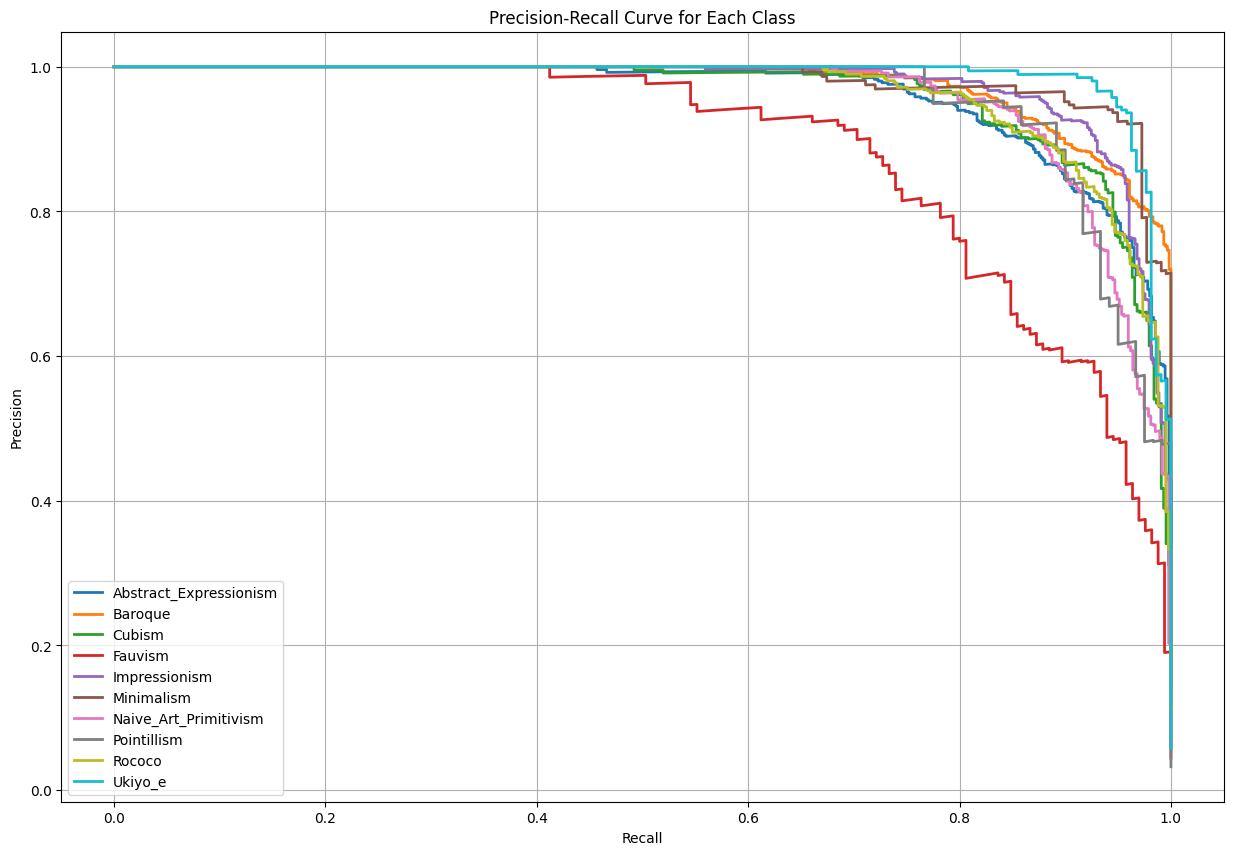

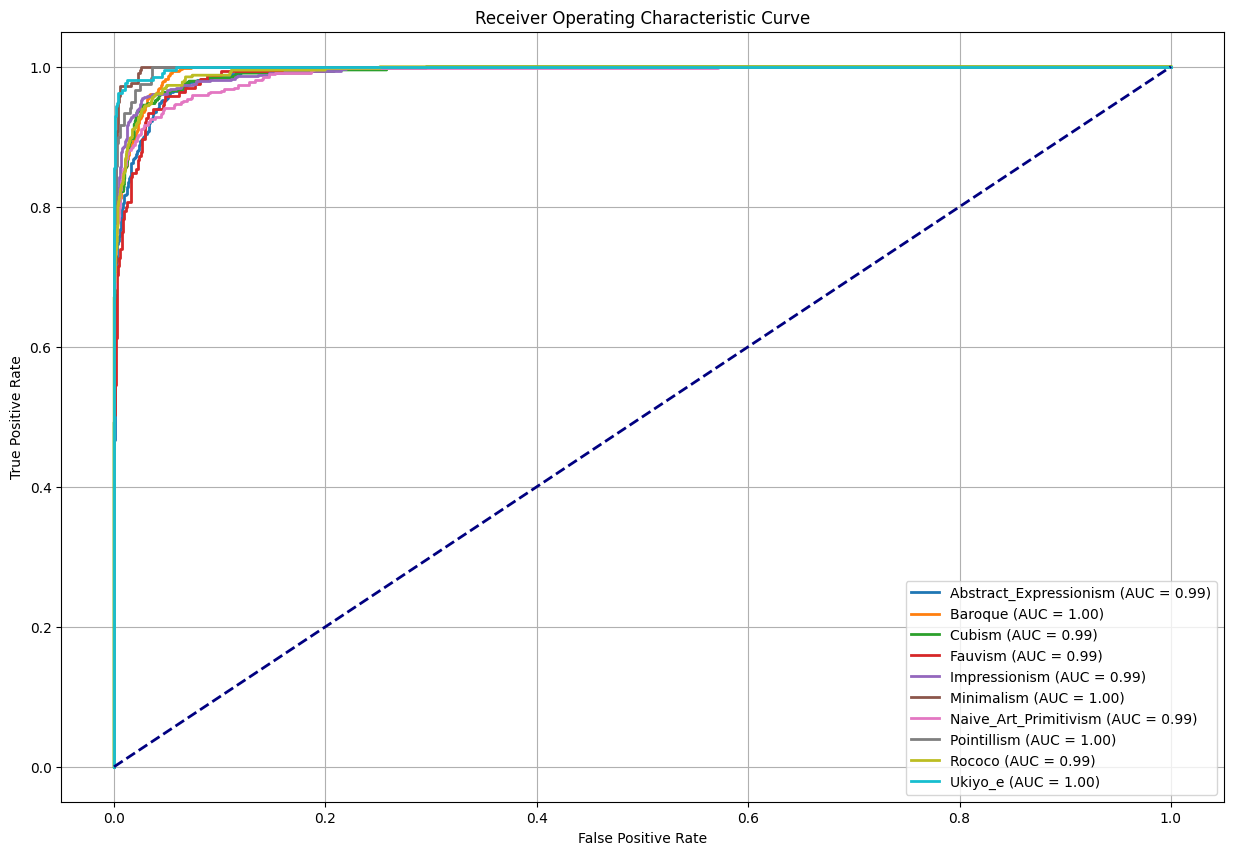

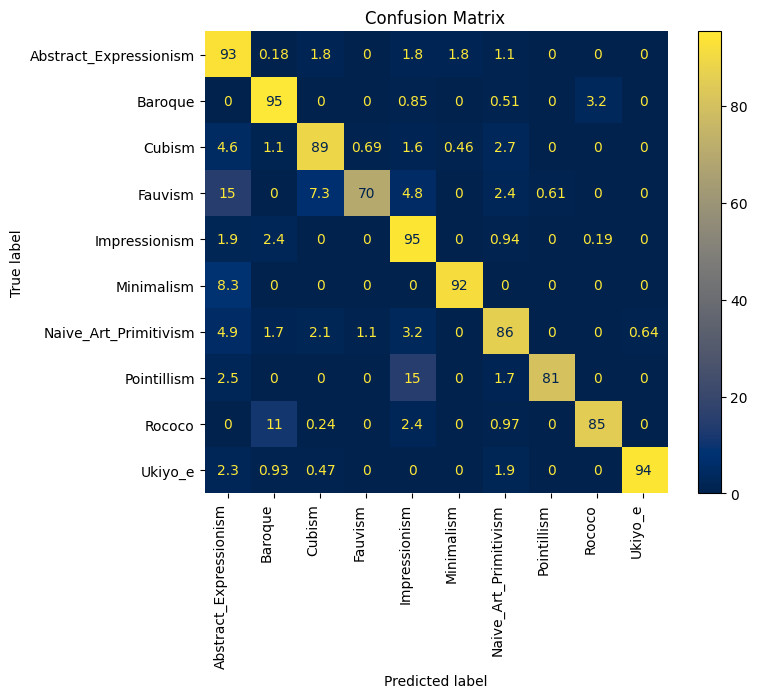

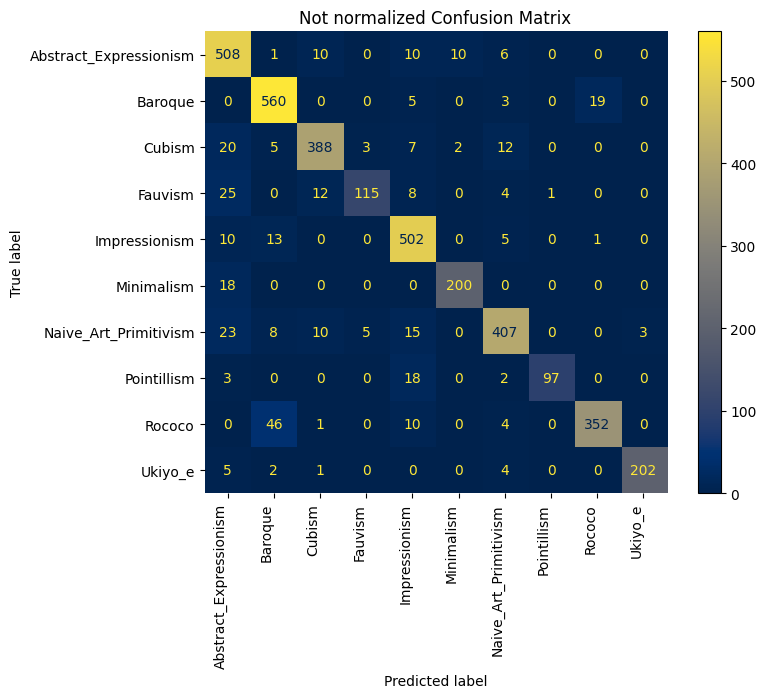

In [8]:
from sklearn.ensemble import RandomForestClassifier

best_rf = RandomForestClassifier(
    n_estimators=900,
    max_depth=20,
    min_samples_split=6,
    min_samples_leaf=2,
    max_features='sqrt',
    bootstrap=False,
    criterion='entropy',
    random_state=42,
    n_jobs=-1  # Use all cores for faster training
)

best_rf.fit(X_train_scaled, y_train)
frmodel_pred = best_rf.predict(X_test_scaled)
frmodel_pred_proba = best_rf.predict_proba(X_test_scaled)

evaluate_model(y_test,frmodel_pred,frmodel_pred_proba)

In [9]:
avg= e.kfold_crossvalidation(train_data, train_labels, 5,  best_rf , 1)
print(avg)

       Fold  Precision    Recall        F1  Accuracy  Train time  \
0         1   0.906993  0.905161  0.904920  0.905161  125.895216   
1         2   0.899151  0.895974  0.895329  0.895974  126.398836   
2         3   0.888511  0.885166  0.885066  0.885166  126.405279   
3         4   0.895404  0.893002  0.892301  0.893002  123.897396   
4         5   0.899946  0.896244  0.895694  0.896244  125.715264   
5   Average   0.898001  0.895109  0.894662  0.895109  125.662398   
6  1.581139   0.006759  0.007183  0.007148  0.007183    1.032769   

   Prediction time  
0         5.294651  
1         6.313359  
2         6.105890  
3         4.192062  
4         4.902956  
5         5.361784  
6         0.872134  


/venv/main/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [15:27:11] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


                        precision    recall  f1-score      support
Abstract_Expressionism   0.922936  0.882456  0.902242   570.000000
Baroque                  0.947189  0.928214  0.937605   599.000000
Cubism                   0.917620  0.934732  0.926097   429.000000
Fauvism                  0.787879  0.890411  0.836013   146.000000
Impressionism            0.952919  0.913357  0.932719   554.000000
Minimalism               0.926606  0.918182  0.922374   220.000000
Naive_Art_Primitivism    0.906582  0.908511  0.907545   470.000000
Pointillism              0.841667  0.971154  0.901786   104.000000
Rococo                   0.900726  0.934673  0.917386   398.000000
Ukiyo_e                  0.957944  0.971564  0.964706   211.000000
accuracy                 0.919481  0.919481  0.919481     0.919481
macro avg                0.906207  0.925325  0.914847  3701.000000
weighted avg             0.920870  0.919481  0.919727  3701.000000
--------------------------------------------------------------

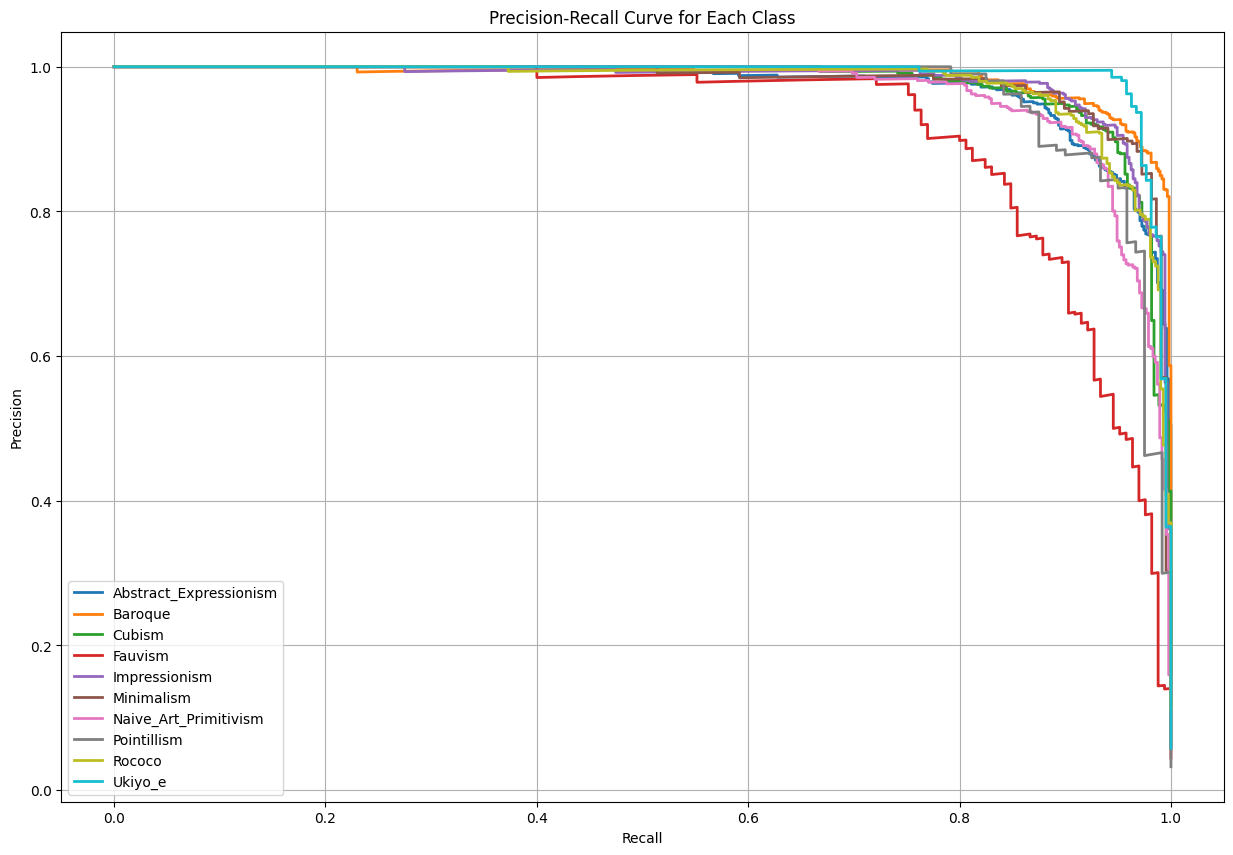

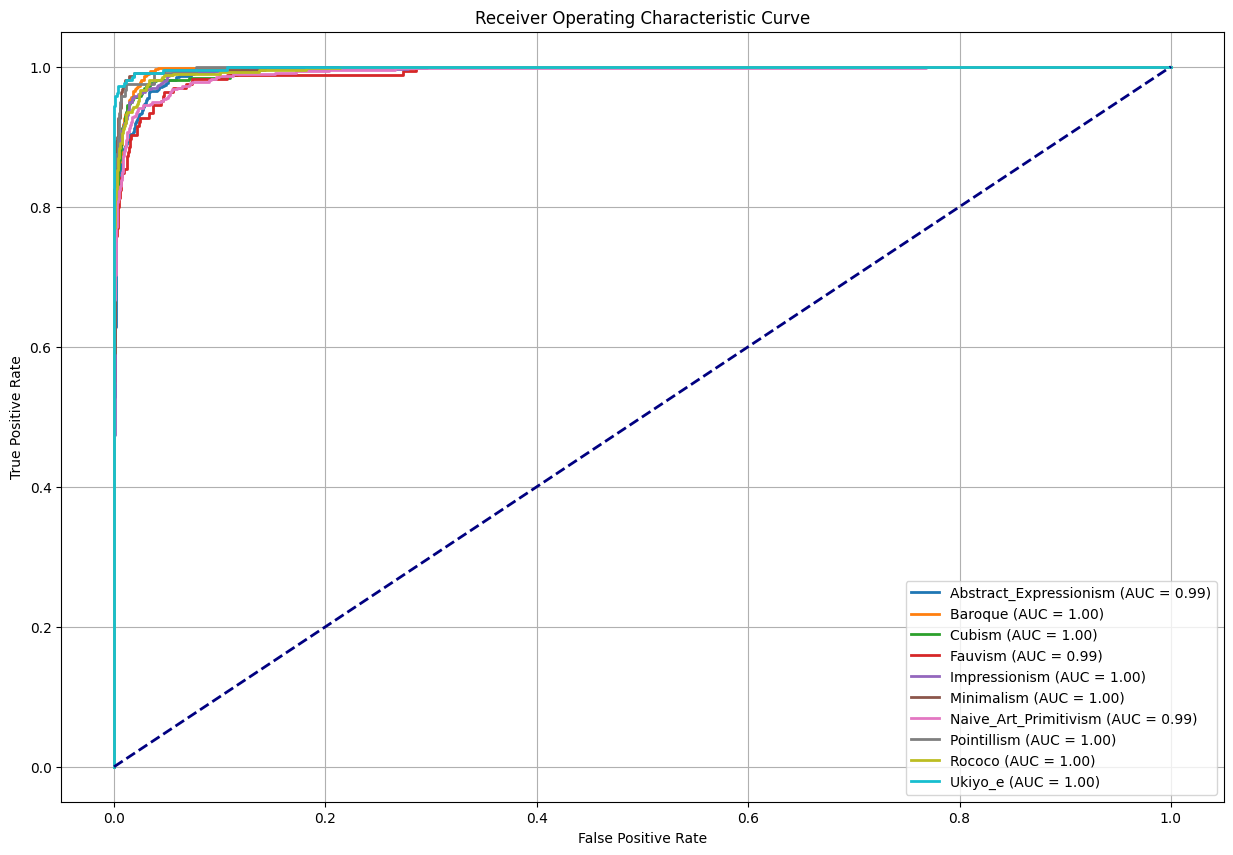

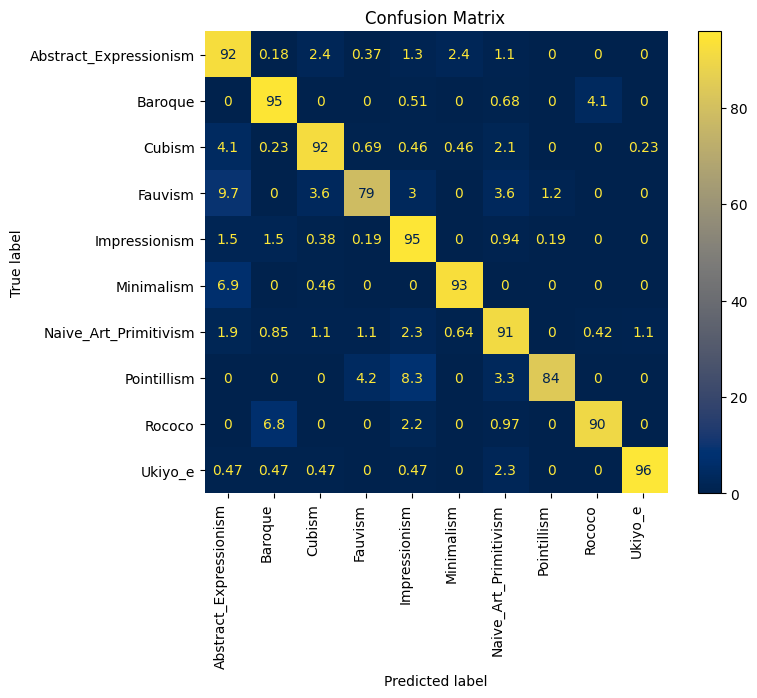

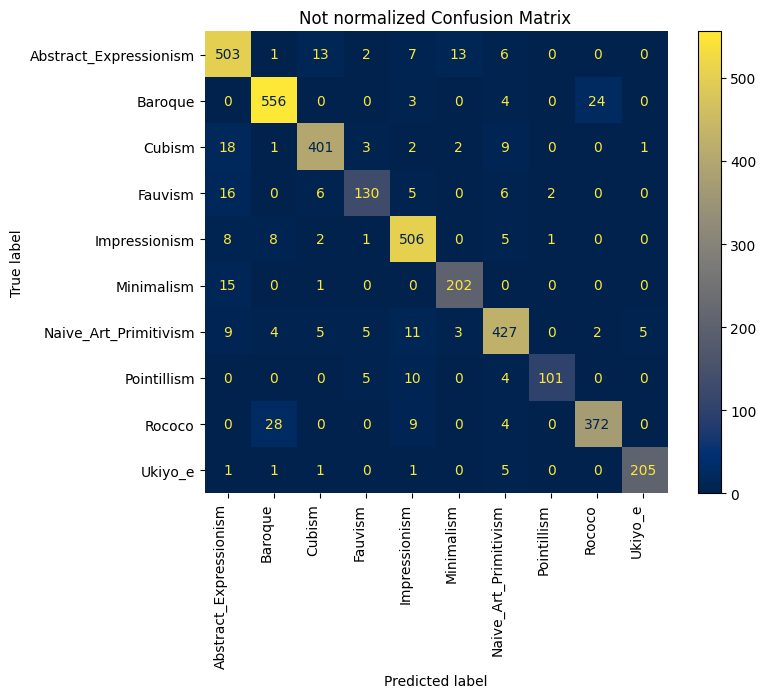

In [4]:
import xgboost as xgb

best_xgb = xgb.XGBClassifier(
    n_estimators=900,
    max_depth=4,
    learning_rate=0.17404904511951427,
    subsample=0.7846029675418292,
    colsample_bytree=0.7100830138794556,
    gamma=0.0264969818078781,
    reg_lambda=0.3460029118030738,
    reg_alpha=0.17069404218780862,
    objective='multi:softprob', 
    use_label_encoder=False,
    eval_metric='mlogloss',  
    random_state=42,
    n_jobs=-1
)

best_xgb.fit(X_train_scaled, y_train)
frmodel_pred = best_xgb.predict(X_test_scaled)
frmodel_pred_proba = best_xgb.predict_proba(X_test_scaled)

evaluate_model(y_test,frmodel_pred,frmodel_pred_proba)

In [5]:
avg= e.kfold_crossvalidation(train_data, train_labels, 5,  best_xgb , 1)
print(avg)

/venv/main/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [15:29:52] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/venv/main/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [15:32:31] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/venv/main/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [15:35:10] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/venv/main/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [15:37:49] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/venv/main/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [15:40:29] WARNING: /w

       Fold  Precision    Recall        F1  Accuracy  Train time  \
0         1   0.923594  0.923534  0.923463  0.923534  158.639632   
1         2   0.912945  0.912726  0.912592  0.912726  159.133940   
2         3   0.914239  0.913537  0.913497  0.913537  159.188623   
3         4   0.922137  0.922183  0.922025  0.922183  159.907882   
4         5   0.923450  0.922994  0.922801  0.922994  161.572054   
5   Average   0.919273  0.918995  0.918876  0.918995  159.688426   
6  1.581139   0.005237  0.005382  0.005357  0.005382    1.146019   

   Prediction time  
0         0.007943  
1         0.007670  
2         0.007519  
3         0.008127  
4         0.008405  
5         0.007933  
6         0.000354  


                        precision    recall  f1-score      support
Abstract_Expressionism   0.886239  0.916509  0.901119   527.000000
Baroque                  0.935264  0.874204  0.903704   628.000000
Cubism                   0.862700  0.897619  0.879813   420.000000
Fauvism                  0.824242  0.855346  0.839506   159.000000
Impressionism            0.913371  0.929119  0.921178   522.000000
Minimalism               0.954128  0.888889  0.920354   234.000000
Naive_Art_Primitivism    0.910828  0.906977  0.908898   473.000000
Pointillism              0.875000  0.897436  0.886076   117.000000
Rococo                   0.869249  0.877751  0.873479   409.000000
Ukiyo_e                  0.948598  0.957547  0.953052   212.000000
accuracy                 0.900838  0.900838  0.900838     0.900838
macro avg                0.897962  0.900140  0.898718  3701.000000
weighted avg             0.901824  0.900838  0.900977  3701.000000
--------------------------------------------------------------

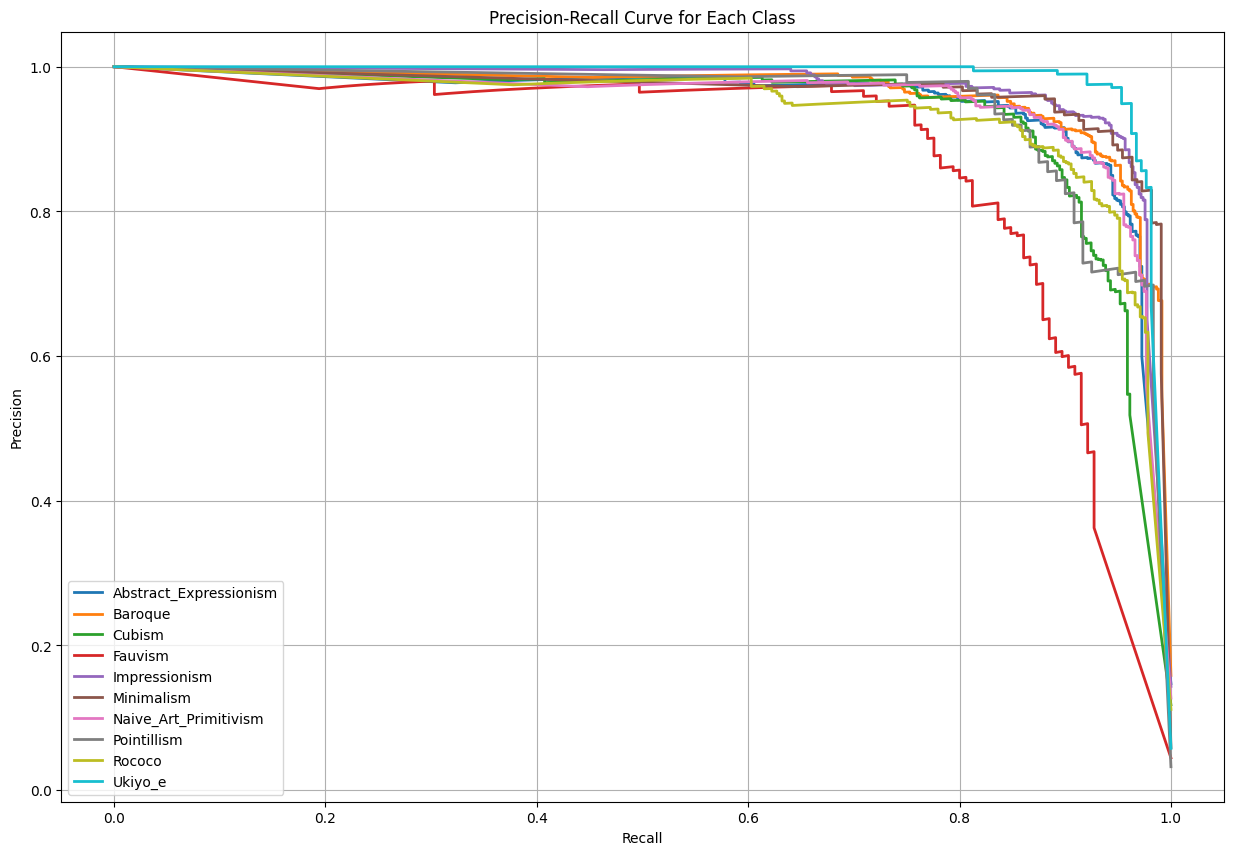

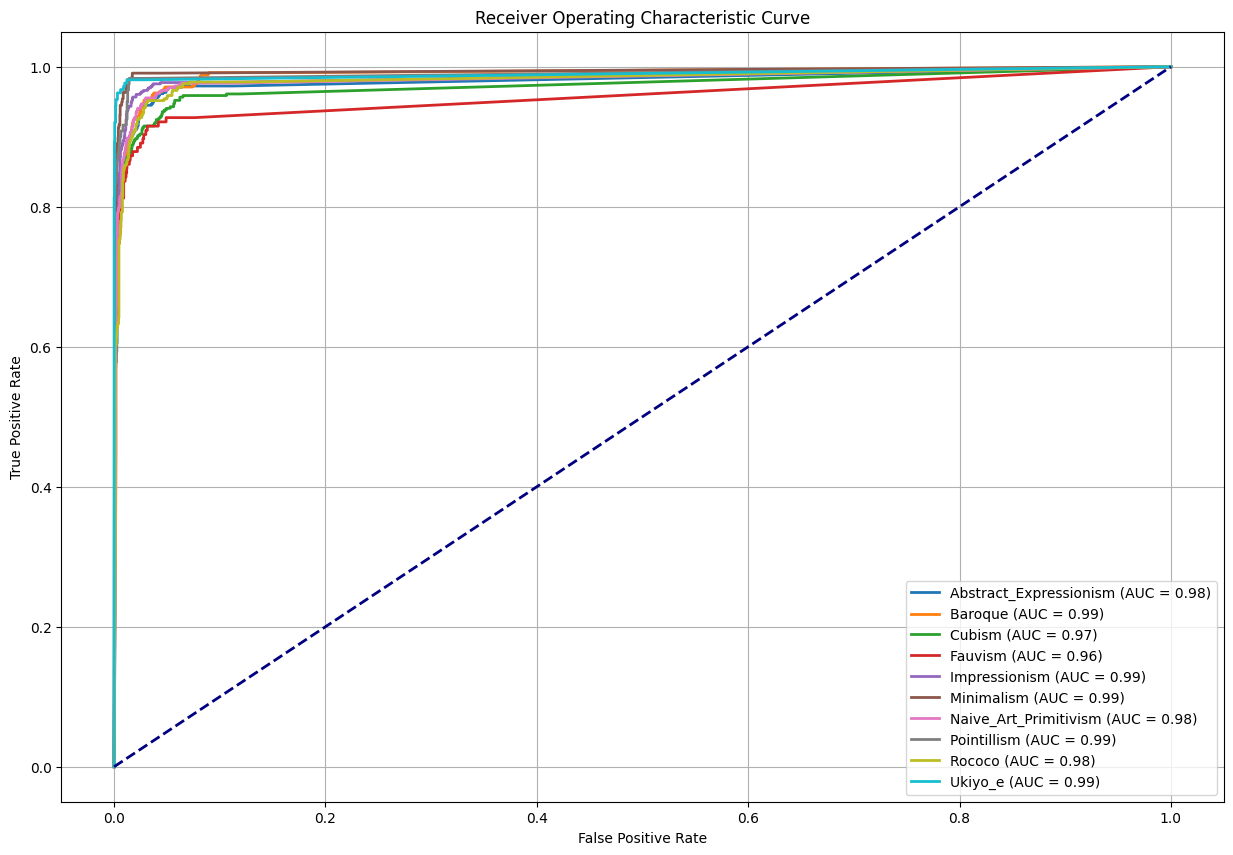

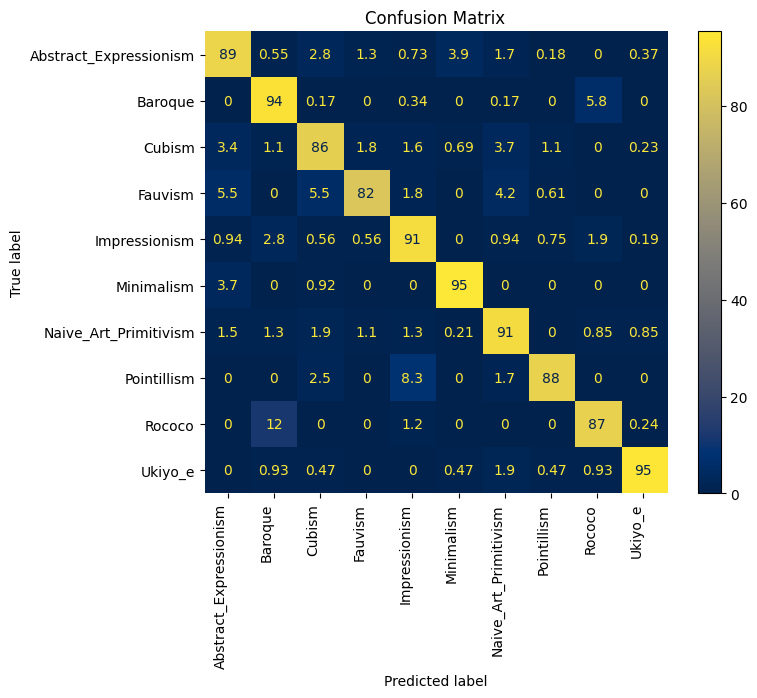

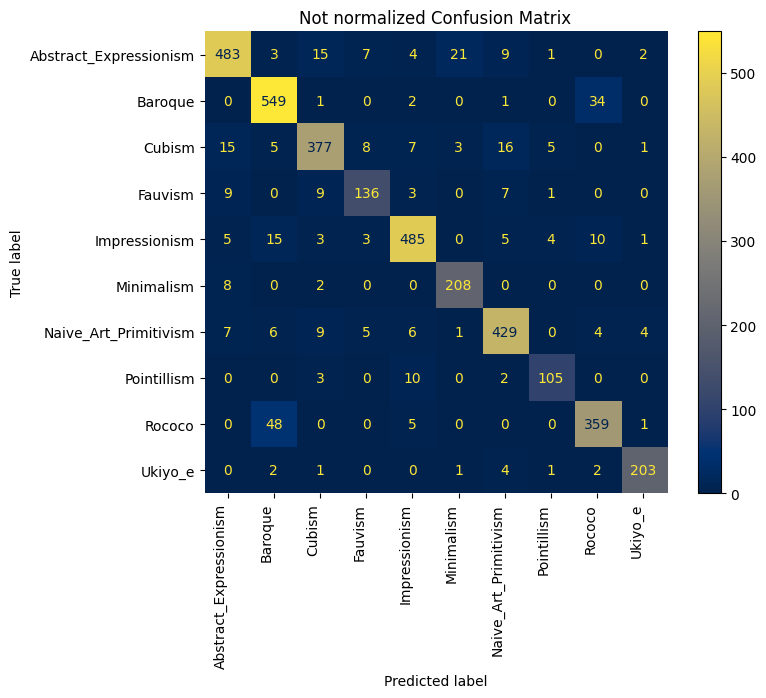

In [7]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(
    metric='cosine',
    algorithm='brute',
    n_neighbors=6,
    weights='distance',
    leaf_size=30,
    p=2  
)

knn_model.fit(X_train_scaled, y_train)
frmodel_pred = knn_model.predict(X_test_scaled)
frmodel_pred_proba = knn_model.predict_proba(X_test_scaled)

evaluate_model(y_test,frmodel_pred,frmodel_pred_proba)

In [8]:
knn_model = KNeighborsClassifier(
    metric='cosine',
    algorithm='brute',
    n_neighbors=6,
    weights='distance',
    leaf_size=30,
    p=2  
)


avg= e.kfold_crossvalidation(train_data, train_labels, 5,  knn_model , 1)
print(avg)
print("....")

       Fold  Precision    Recall        F1  Accuracy  Train time  \
0         1   0.907615  0.906782  0.906843  0.906782    0.020982   
1         2   0.889829  0.888409  0.888482  0.888409    0.021256   
2         3   0.894629  0.892732  0.892962  0.892732    0.020547   
3         4   0.891430  0.889760  0.889898  0.889760    0.021220   
4         5   0.894429  0.893812  0.893666  0.893812    0.020921   
5   Average   0.895586  0.894299  0.894370  0.894299    0.020985   
6  1.581139   0.007024  0.007311  0.007292  0.007311    0.000285   

   Prediction time  
0         0.563315  
1         0.536177  
2         0.533873  
3         0.536844  
4         0.550017  
5         0.544045  
6         0.012492  
....
